In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [20]:
data_dir = '/mnt/c/Users/ferna/Desktop/SingleCell/data/'
%run -i '../../utils/load_data.py'

In [4]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.stats import hypergeom
def hyper_test(M, n, N, k):
    
    hpd = hypergeom(M, n, N)
    p_depleted = hpd.cdf(k)
    p_enriched = hpd.sf(k-1)
    
    return p_depleted, p_enriched

In [5]:
mpl.rcParams["mathtext.fontset"] = "stix"

# Table 1: Number of skipped exons events per dataset

We consider an alternative exon as observed if the following two premises are true:
* At least one informative junction read is observed in at least 10% of the cells.
* The observations amount to an average $\hat{\Psi}$ between 0.05 and 0.95.

In [6]:
print('Chen dataset')
print('Total observed exons:')
print(np.sum((chen_PSI.mean(axis=1) <= 0.95) & (chen_PSI.mean(axis=1) >= 0.05) & (chen_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(chen_read_counts.loc[(chen_PSI.mean(axis=1) <= 0.95) & (chen_PSI.mean(axis=1) >= 0.05) & (chen_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(),1) )

Chen dataset
Total observed exons:
3276
Mean reads per event
3.1


In [7]:
print('Lescroart dataset')
print('Total observed exons:')
print(np.sum((lescroart_PSI.mean(axis=1) <= 0.95) & (lescroart_PSI.mean(axis=1) >= 0.05) & (lescroart_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(lescroart_read_counts.loc[(lescroart_PSI.mean(axis=1) <= 0.95) & (lescroart_PSI.mean(axis=1) >= 0.05) & (lescroart_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(), 1))

Lescroart dataset
Total observed exons:
3007
Mean reads per event
3.2


In [8]:
print('Trapnell dataset')
print('Total observed exons:')
print(np.sum((trapnell_PSI.mean(axis=1) <= 0.95) & (trapnell_PSI.mean(axis=1) >= 0.05) & (trapnell_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(trapnell_read_counts.loc[(trapnell_PSI.mean(axis=1) <= 0.95) & (trapnell_PSI.mean(axis=1) >= 0.05) & (trapnell_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(), 1))

Trapnell dataset
Total observed exons:
4457
Mean reads per event
14.4


In [9]:
print('Song dataset')
print('Total observed exons:')
print(np.sum((song_PSI.mean(axis=1) <= 0.95) & (song_PSI.mean(axis=1) >= 0.05) & (song_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(song_read_counts.loc[(song_PSI.mean(axis=1) <= 0.95) & (song_PSI.mean(axis=1) >= 0.05) & (song_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(), 1))

Song dataset
Total observed exons:
5355
Mean reads per event
88.8


In [10]:
print('Fletcher dataset')
print('Total observed exons:')
print(np.sum((das_PSI.mean(axis=1) <= 0.95) & (das_PSI.mean(axis=1) >= 0.05) & (das_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(das_read_counts.loc[(das_PSI.mean(axis=1) <= 0.95) & (das_PSI.mean(axis=1) >= 0.05) & (das_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(), 1))

Fletcher dataset
Total observed exons:
684
Mean reads per event
2.7


In [11]:
print('Shalek dataset')
print('Total observed exons:')
print(np.sum((shalek_PSI.mean(axis=1) <= 0.95) & (shalek_PSI.mean(axis=1) >= 0.05) & (shalek_PSI.isna().mean(axis=1) <= 0.9)))
print('Mean reads per event')
print(round(shalek_read_counts.loc[(shalek_PSI.mean(axis=1) <= 0.95) & (shalek_PSI.mean(axis=1) >= 0.05) & (shalek_PSI.isna().mean(axis=1) <= 0.9)].mean(axis=1).mean(), 1))

Shalek dataset
Total observed exons:
380
Mean reads per event
213.4


# Extent of bimodality among exons

In this notebook, we quantify how many events qualify as biomodal. For this, we use the following ad-hoc quartile definition of bimodality:
An intermediate exon ($0.2 \leq \mu (\hat{\Psi}) \leq 0.8)$ is bimodal if the following are true:

1. The first quartile of $\hat{\Psi}$ is equal or less than 0.25.

2. The third quartile of $\hat{\Psi}$ is equal or greater than 0.75.

### Shalek bimodal events

We check some of the exons reviewed in the Shalek et al., 2013 paper that describes bimodal splicing. None of the exons we checked are bimodal by the quartile definition.

In [5]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                                                                        shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]


In [6]:
shalek_paper_bin_exon = ['Acpp_AE', 'Clec7a_other_1', 'Irgm1_1', 'Irf7_1', 'Clec4n_2', 'Sat1_nmdSE_1', 'Zfp207', 
                         'Abi1_7', 'Srsf7_nmdSE_1', 'Psmg4_1']

In [7]:
for event in [x for x in shalek_paper_bin_exon if x in shalek_PSI_filtered.index]:
    print(event)
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25))
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75))

Clec7a_other_1
0.0
0.13411938098747234
Irgm1_1
0.3618864292589028
0.5
Clec4n_2
0.5853566009104704
0.6755955139493929
Sat1_nmdSE_1
0.0014144271570014145
0.11048371917937136
Abi1_7
0.0995260663507109
0.6094674556213018
Srsf7_nmdSE_1
0.0
0.1562189054726368


This is using the MISO calculations of $\hat{\Psi}$ from the Shalek paper.

In [8]:
sra_meta = pd.read_csv(data_dir + 'shalek/shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv(data_dir + 'shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv(data_dir + 'shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv(data_dir + 'shalek/shalek.pca.tab', index_col = 0, sep='\t')
shalek_cells = shalek_PSI_paper.columns[1:18]

for event in shalek_paper_bin_exon:
    gen = event.split('_')[0]
    if len(shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index) >= 1:
        print(event)
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.25))
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.75))

Irgm1_1
0.19
0.98
Irf7_1
0.11
0.8899999999999999
Clec4n_2
0.515
0.665
Zfp207
0.0
0.20500000000000002
Abi1_7
0.395
0.9


### Song bimodal events

Here we compare the modality of observations as determined in the Song et al., 2017 paper, versus the quartile definition of bimodality. We also see the proportion of exons defined as bimodal (either by Song et al., or by the quartile definition that are selected by the 10 mRNA filter. 

In [29]:
song_modalities = pd.read_csv(data_dir + 'song/song_event_modalities.tab', sep='\t', index_col = 0)
song_outrigger = pd.read_csv(data_dir + 'song/song_outrigger_psi.tab', index_col = 0)
outrigger_iPSC = [x for x in list(song_outrigger.index) if x[0] == 'P']
outrigger_NPC = [x for x in list(song_outrigger.index) if ((x[0] == 'C') or (x[0] == 'N'))]
outrigger_MN = [x for x in list(song_outrigger.index) if x[0] == 'M']

In [61]:
song_modalities_original = pd.read_csv('../../../GSE85908_modalities_tidy.csv', index_col=0)
song_skipped = [x for x in song_modalities_original.index if len(song_modalities_original.loc[x, 
                                                                                'event_id'].split('@exon:')) == 3]
song_modalities_original = song_modalities_original.loc[song_skipped]

In [62]:
ipsc_observations_all = len(song_modalities_original.loc[song_modalities_original.phenotype == 'iPSC'])
ipsc_bimodal_all = np.sum(song_modalities_original.loc[song_modalities_original.phenotype == 'iPSC'].modality=='bimodal')

npc_observations_all = len(song_modalities_original.loc[song_modalities_original.phenotype == 'NPC'])
npc_bimodal_all = np.sum(song_modalities_original.loc[song_modalities_original.phenotype == 'NPC'].modality=='bimodal')

mn_observations_all = len(song_modalities_original.loc[song_modalities_original.phenotype == 'MN'])
mn_bimodal_all = np.sum(song_modalities_original.loc[song_modalities_original.phenotype == 'MN'].modality=='bimodal')

print('iPSC')
print(str(ipsc_bimodal_all)+' out of '+str(ipsc_observations_all)+' bimodal.')
print(str(round(100*(ipsc_bimodal_all/ipsc_observations_all), 2)) + '%')

print('NPC')
print(str(npc_bimodal_all)+' out of '+str(npc_observations_all)+' bimodal.')
print(str(round(100*(npc_bimodal_all/npc_observations_all), 2)) + '%')

print('MN')
print(str(mn_bimodal_all)+' out of '+str(mn_observations_all)+' bimodal.')
print(str(round(100*(mn_bimodal_all/mn_observations_all), 2)) + '%')

iPSC
3223 out of 11071 bimodal.
29.11%
NPC
2245 out of 8222 bimodal.
27.3%
MN
1269 out of 5206 bimodal.
24.38%


In [72]:
def get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = '', outrigger_modalities = '', outrigger_subpop = '', 
                    outrigger_cell_type = '', cell_min=0.5):
    
    PSI_filtered = process_subpop(subpop, PSI_tab, mrna_counts, 
                                    mrna_per_event, read_counts, coverage_tab['SJ_coverage'], psi_int, 
                                  mrna_min, cell_min=cell_min)
    
    PSI_observed = (PSI_tab[subpop].isna().mean(axis = 1) <= (1-cell_min))
    PSI_int = (np.abs(0.5-PSI_tab[subpop].mean(axis = 1)) <= (0.5-psi_int))
    PSI_unfiltered = PSI_tab.loc[(PSI_observed & PSI_int), subpop]
    
    filtered_bimodal_by_song = 0
    unfiltered_bimodal_by_song = 0
    
    assert np.all([x in PSI_unfiltered.index for x in PSI_filtered[0].index])
    
    suma = len(PSI_unfiltered.index)
    suma_f = len(PSI_filtered[0].index)
    suma_unfiltered = 0
    suma_filtered_all = 0
    suma_filtered = 0
    suma_outrigger = 0
    suma_outrigger_total = 0

    for evento in PSI_unfiltered.index:

        q25_unfiltered = PSI_unfiltered.loc[evento].quantile(0.25)
        q75_unfiltered = PSI_unfiltered.loc[evento].quantile(0.75)
        if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
            suma_unfiltered += 1
            
        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']
                if outrigger_modalities.loc[evento, outrigger_cell_type] == 'bimodal':
                    unfiltered_bimodal_by_song += 1

        if evento in PSI_filtered[0].index:

            q25_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.25)
            q75_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.75)        
            if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
                suma_filtered_all += 1

            q25_filtered = PSI_filtered[0].loc[evento].quantile(0.25)
            q75_filtered = PSI_filtered[0].loc[evento].quantile(0.75)
            if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
                suma_filtered += 1
                
                
            if len(outrigger_modalities) >= 1:
                if evento in outrigger_modalities.index:
                    outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']
                    if outrigger_modalities.loc[evento, outrigger_cell_type] == 'bimodal':
                        filtered_bimodal_by_song += 1
                    

        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                suma_outrigger_total += 1
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']

                q25_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.25)
                q75_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.75)

                if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
                    suma_outrigger += 1


    p_deplete = hyper_test(suma, suma_unfiltered, suma_f, suma_filtered)[0]
    
    
    print('Total intermediate exons: ' + str(suma))
    print('Total intermediate exons that are bimodal by quartile definition: ' + str(suma_unfiltered))
    print('#################')
    if len(outrigger_modalities) >= 1:
        print('Intermediate exons observed in Song et al.: ' + str(suma_outrigger_total))
        print('Song et al. exons that are bimodal by Song et al. definition: ' + str(unfiltered_bimodal_by_song))
        print(str(round(100*unfiltered_bimodal_by_song/suma_outrigger_total))+'%')
        print('Song et al. exons that are bimodal by quartile definition: ' + str(suma_outrigger))
        print(str(round(100*suma_outrigger/suma_outrigger_total))+'%')
        print('#################')
    print('Selected exons: ' + str(suma_f))
    print('Selected exons that are bimodal by Song et al. definition: ' + str(filtered_bimodal_by_song))
    print(str(round(100*filtered_bimodal_by_song/suma_f))+'%')
    print('Selected exons that are bimodal by quartile definition: ' + str(suma_filtered))
    print(str(round(100*suma_filtered/suma_f))+'%')
    print('#################')
    print('Depletion of quartile bimodality in selected exon (p-value): ' + str(p_deplete))
                    
    
    return (suma, suma_f, suma_unfiltered, suma_filtered_all, suma_filtered, suma_outrigger, suma_outrigger_total, 
            p_deplete, filtered_bimodal_by_song, unfiltered_bimodal_by_song) 


#### Percent bimodal, from the supplementary data from Song et al., 2017

Modalities as reported in **GSE85908_modalities_tidy.csv.gz**; see process_data.ipynb for the code that we used to map the exon IDs. We only use skipped exons that are reported both by Song et al and by us.

##### Percent of shared skipped exons that are reported as bimodal in the Song et al. paper

(All shared exons)

In [11]:
print('Total exons in iPSC: ' + str((len(song_modalities) - (song_modalities.iPSC == '-').sum())))
print('Bimodal exons in iPSC: ' + str((song_modalities.iPSC == 'bimodal').sum()))
print('Percentage bimodal in iPSC: ' + str(round(((song_modalities.iPSC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.iPSC == '-').sum())) * 100, 2))+'%')

Total exons in iPSC: 8895
Bimodal exons in iPSC: 2835
Percentage bimodal in iPSC: 31.87%


In [12]:
print('Total exons in NPC: ' + str((len(song_modalities) - (song_modalities.NPC == '-').sum())))
print('Bimodal exons in NPC: ' + str((song_modalities.NPC == 'bimodal').sum()))
print('Percentage bimodal in NPC: ' + str(round(((song_modalities.NPC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.NPC == '-').sum())) * 100, 2))+'%')

Total exons in NPC: 6539
Bimodal exons in NPC: 1981
Percentage bimodal in NPC: 30.3%


In [13]:
print('Total exons in MN: ' + str((len(song_modalities) - (song_modalities.MN == '-').sum())))
print('Bimodal exons in MN: ' + str((song_modalities.MN == 'bimodal').sum()))
print('Percentage bimodal in MN: ' + str(round(((song_modalities.MN == 'bimodal').sum() / (len(song_modalities) - (song_modalities.MN == '-').sum())) * 100, 2))+'%')

Total exons in MN: 4156
Bimodal exons in MN: 1131
Percentage bimodal in MN: 27.21%


##### Percent bimodal in intermediate exons

We break it down as: 1) Percent bimodal in intermediate exons according to Song et al. 2) Bimodal according to the quartile definition. 3) Percent bimodal after filtering according to Song et al. 4) Bimodal after filtering according to the quartile definition.

Here we do the analysis in the cell type as labeled in the original paper. The reason is that: 1) The modality definitions in Song et al. are assigned to cell types. 2) We were unable to match cells specifically, as their ID is not matched to the accession run ID in the supplementary materials of Song et al.

We observe that:
* The percent of exons that are labeled as bimodal by Song et al is larger for intermediate exons than for all exons.
* The percent of selected intermediate exons that are bimodal decrease after filtering for both definitions.

In [85]:
get_proportions(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_iPSC, 
                outrigger_cell_type = 'iPSC')

Total intermediate exons: 616
Total intermediate exons that are bimodal by quartile definition: 269
#################
Intermediate exons observed in Song et al.: 579
Song et al. exons that are bimodal by Song et al. definition: 455
79%
Song et al. exons that are bimodal by quartile definition: 177
31%
#################
Selected exons: 55
Selected exons that are bimodal by Song et al. definition: 8
15%
Selected exons that are bimodal by quartile definition: 0
0%
#################
Depletion of quartile bimodality in selected exon (p-value): 2.5476050557883045e-15


(616, 55, 269, 0, 0, 177, 579, 2.5476050557883045e-15, 8, 455)

In [86]:
get_proportions(song_PSI, song_NPC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_NPC, 
                outrigger_cell_type = 'NPC')

Total intermediate exons: 220
Total intermediate exons that are bimodal by quartile definition: 105
#################
Intermediate exons observed in Song et al.: 203
Song et al. exons that are bimodal by Song et al. definition: 176
87%
Song et al. exons that are bimodal by quartile definition: 71
35%
#################
Selected exons: 28
Selected exons that are bimodal by Song et al. definition: 14
50%
Selected exons that are bimodal by quartile definition: 2
7%
#################
Depletion of quartile bimodality in selected exon (p-value): 1.2111076400049347e-06


(220, 28, 105, 5, 2, 71, 203, 1.2111076400049347e-06, 14, 176)

In [75]:
get_proportions(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_MN, 
                outrigger_cell_type = 'MN')

Total intermediate exons: 188
Total intermediate exons that are bimodal by quartile definition: 85
#################
Intermediate exons observed in Song et al.: 176
Song et al. exons that are bimodal by Song et al. definition: 154
88%
Song et al. exons that are bimodal by quartile definition: 59
34%
#################
Selected exons: 20
Selected exons that are bimodal by Song et al. definition: 16
80%
Selected exons that are bimodal by quartile definition: 4
20%
#################
Depletion of quartile bimodality in selected exon (p-value): 0.01345020242302973


(188, 20, 85, 8, 4, 59, 176, 0.01345020242302973, 16, 154)

##### The issue with Song et al's definition of bimodality

There are some events that are called bimodal, but they certainly look more like unimodal exons with inflation of 0 and 1 values; or at the very least, included/excluded modalities.

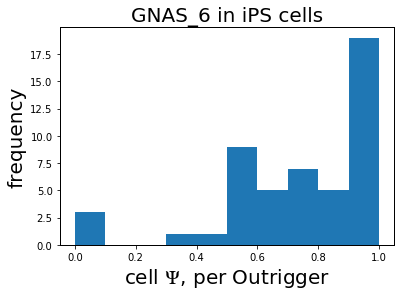

In [68]:
song_modalities.loc['GNAS_6'].song_annotation

plt.hist(song_outrigger.loc[outrigger_iPSC, 
                   'exon:chr20:57470667-57470739:+@exon:chr20:57473996-57474040:+@exon:chr20:57478586-57478640:+'].dropna())
plt.title('GNAS_6 in iPS cells', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.xlabel('cell $\Psi$, per Outrigger', fontsize=20)
plt.show()

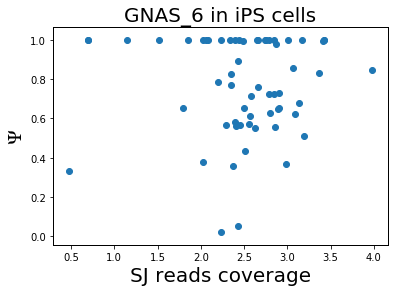

In [66]:
plt.scatter(np.log10(song_read_counts.loc['GNAS_6', song_iPSC]+1), song_PSI.loc['GNAS_6', song_iPSC])
plt.title('GNAS_6 in iPS cells', fontsize=20)
plt.ylabel('$\Psi$', fontsize=20)
plt.xlabel('SJ reads coverage', fontsize=20)
plt.show()

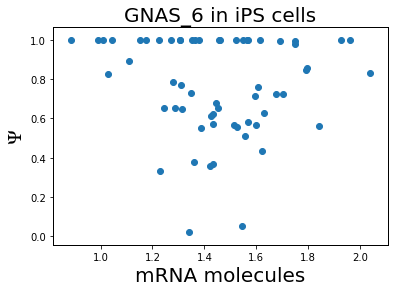

In [70]:
plt.scatter(np.log10(mrna_per_event_song.loc['GNAS_6', song_iPSC]+1), song_PSI.loc['GNAS_6', song_iPSC])
plt.title('GNAS_6 in iPS cells', fontsize=20)
plt.ylabel('$\Psi$', fontsize=20)
plt.xlabel('mRNA molecules', fontsize=20)
plt.show()

#### Table of bimodality by given cell type

Comparison of the intermediate exons that are bimodal by the quartile definition, before and after filtering.

In [34]:
def test_dset(PSI_tab, subpop_list, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
             cell_min=0.5):
    total = []
    bimodal_total = []
    filtered = []
    bimodal_filtered = []
    pvals = []
    for subpop in subpop_list:
        proport = get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, 
                                  psi_int = psi_int, mrna_min = mrna_min, cell_min=cell_min)
        
        total.append(proport[0])
        bimodal_total.append(proport[2])
        filtered.append(proport[1])
        bimodal_filtered.append(proport[4]) # filtered
        #bimodal_filtered.append(proport[3]) # unfiltered
        pvals.append(proport[7])
        
    return total, bimodal_total, filtered, bimodal_filtered, pvals



In [18]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_ES2i, chen_ES, chen_Epi, chen_MN]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72]])
cells_in_cluster.extend([len(x) for x in [song_iPSC, song_NPC, song_MN]])
cells_in_cluster.append(len(shalek_PSI.columns))
cells_in_cluster.append(len(das_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_ES2i, chen_ES, chen_Epi, chen_MN], chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_iPSC, song_NPC, song_MN], song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)

das_processed = test_dset(das_PSI, [das_PSI.columns], das_mrna_counts, mrna_per_event_das, 
          das_read_counts, das_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])
total.extend(das_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])
bimodal_total.extend(das_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])
filtered.extend(das_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])
bimodal_filtered.extend(das_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])
pvals.extend(das_processed[4])

Total intermediate exons: 452
Total intermediate exons that are bimodal by quartile definition: 108
#################
Selected exons: 97
Selected exons that are bimodal by Song et al. definition: 0
Selected exons that are bimodal by quartile definition: 0
#################
Depletion of quartile bimodality in selected exon (p-value): 6.425484125955408e-14
Total intermediate exons: 381
Total intermediate exons that are bimodal by quartile definition: 110
#################
Selected exons: 81
Selected exons that are bimodal by Song et al. definition: 0
Selected exons that are bimodal by quartile definition: 0
#################
Depletion of quartile bimodality in selected exon (p-value): 1.5871904004859756e-14
Total intermediate exons: 476
Total intermediate exons that are bimodal by quartile definition: 120
#################
Selected exons: 98
Selected exons that are bimodal by Song et al. definition: 0
Selected exons that are bimodal by quartile definition: 0
#################
Depletion o

In [19]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

cell_type = ['mES2i', 'mES', 'Epi', 'Motor neuron', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC', 'Olfactory neurons']
dataset = ['Chen']*4 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek'] + ['Fletcher']
organism = ['Mouse']*6+['Human']*7+['Mouse']*2

bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [20]:
bimodality_table

,dataset,organism,cell_type,cells_in_cluster,total_exons,bimodal_exons,bimodal_percent,selected_exons,selected_bimodal,bimodal_percent_selected,p-val,p-val (adj)
0,Chen,Mouse,mES2i,111,452,108,23.89%,97,0,0.0%,6.425484e-14,2.409557e-13
1,Chen,Mouse,mES,120,381,110,28.87%,81,0,0.0%,1.587190e-14,7.935952e-14
2,Chen,Mouse,Epi,183,476,120,25.21%,98,0,0.0%,7.747198e-15,5.810398e-14
3,Chen,Mouse,Motor neuron,74,457,173,37.86%,43,3,6.98%,1.713953e-06,3.213661e-06
4,Lescroart,Mouse,Heart E6.75,172,286,77,26.92%,33,0,0.0%,1.512964e-05,2.063133e-05
5,Lescroart,Mouse,Heart E7.25,341,291,78,26.8%,36,0,0.0%,5.495198e-06,9.158664e-06
6,Trapnell,Human,Myoblast 00h,58,342,141,41.23%,32,0,0.0%,1.352230e-08,4.056690e-08
7,Trapnell,Human,Myoblast 24h,70,254,104,40.94%,30,2,6.67%,1.245773e-05,1.868659e-05
8,Trapnell,Human,Myoblast 48h,70,213,90,42.25%,22,1,4.55%,4.823279e-05,6.029098e-05
9,Trapnell,Human,Myoblast 72h,33,284,102,35.92%,37,1,2.7%,4.328264e-07,1.082066e-06


In [21]:
bimodality_table.to_csv('selected_int_exons.csv', index=False, header=True)

#### Table of bimodality by given agglomerative clustering

In [80]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_clust_filter[x][0].columns for x in range(len(chen_clust_filter))]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_clust_filter[x][0].columns for x in range(len(trapnell_clust_filter))]])
cells_in_cluster.extend([len(x) for x in [song_clust_filter[x][0].columns for x in range(len(song_clust_filter))]])
cells_in_cluster.append(len(shalek_PSI.columns))
cells_in_cluster.append(len(das_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_clust_filter[x][0].columns for x in range(len(chen_clust_filter))], 
                           chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_clust_filter[x][0].columns for x in range(len(trapnell_clust_filter))], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_clust_filter[x][0].columns for x in range(len(song_clust_filter))], 
                           song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)

das_processed = test_dset(das_PSI, [das_PSI.columns], das_mrna_counts, mrna_per_event_das, 
          das_read_counts, das_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])
total.extend(das_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])
bimodal_total.extend(das_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])
filtered.extend(das_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])
bimodal_filtered.extend(das_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])
pvals.extend(das_processed[4])

Total intermediate exons: 446
Total intermediate exons that are bimodal by quartile definition: 118
#################
Selected exons: 94
Selected exons that are bimodal by Song et al. definition: 0
0%
Selected exons that are bimodal by quartile definition: 0
0%
#################
Depletion of quartile bimodality in selected exon (p-value): 4.089694836903887e-15
Total intermediate exons: 402
Total intermediate exons that are bimodal by quartile definition: 107
#################
Selected exons: 98
Selected exons that are bimodal by Song et al. definition: 0
0%
Selected exons that are bimodal by quartile definition: 1
1%
#################
Depletion of quartile bimodality in selected exon (p-value): 1.7433419418207195e-14
Total intermediate exons: 516
Total intermediate exons that are bimodal by quartile definition: 136
#################
Selected exons: 76
Selected exons that are bimodal by Song et al. definition: 0
0%
Selected exons that are bimodal by quartile definition: 1
1%
###########

In [83]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

cell_type = ['ES', 'Epi, early', 'Epi, late', 'Neuron, early', 'Neuron, late', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC', 'Olfactory neurons']
dataset = ['Chen']*5 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek'] + ['Fletcher']
organism = ['Mouse']*7+['Human']*7+['Mouse']*2

bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [84]:
bimodality_table

,dataset,organism,cell_type,cells_in_cluster,total_exons,bimodal_exons,bimodal_percent,selected_exons,selected_bimodal,bimodal_percent_selected,p-val,p-val (adj)
0,Chen,Mouse,ES,217,446,118,26.46%,94,0,0.0%,4.089695e-15,3.271756e-14
1,Chen,Mouse,"Epi, early",98,402,107,26.62%,98,1,1.02%,1.743342e-14,9.297824e-14
2,Chen,Mouse,"Epi, late",104,516,136,26.36%,76,1,1.32%,2.969315e-10,1.111313e-09
3,Chen,Mouse,"Neuron, early",47,364,117,32.14%,43,0,0.0%,1.559634e-08,3.564878e-08
4,Chen,Mouse,"Neuron, late",22,517,146,28.24%,61,0,0.0%,3.472852e-10,1.111313e-09
5,Lescroart,Mouse,Heart E6.75,172,286,77,26.92%,33,0,0.0%,1.512964e-05,2.017286e-05
6,Lescroart,Mouse,Heart E7.25,341,291,78,26.8%,36,0,0.0%,5.495198e-06,7.993016e-06
7,Trapnell,Human,Myoblast 00h,35,400,142,35.5%,41,0,0.0%,4.519740e-09,1.205264e-08
8,Trapnell,Human,Myoblast 24h,89,251,97,38.65%,27,0,0.0%,7.074301e-07,1.162529e-06
9,Trapnell,Human,Myoblast 48h,72,242,97,40.08%,32,1,3.12%,4.541607e-07,9.083215e-07


In [28]:
bimodality_table.to_csv('selected_int_exons_agg_clusters.csv', index=False, header=True)